# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [33]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
# print(cities)

Number of cities in the list: 585


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [34]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    params = f'{city}&units=metric&appid={weather_api_key}'
    # Create endpoint URL with each city
    city_url = url+params # url+city+f'&appid={weather_api_key}'
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city.capitalize()))
    

    # Add 1 to the record count
    record_count += 1
     
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data  
        
        city_weather = requests.get(city_url).json()
        # pprint(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]['lat']
        # print(f'{city.capitalize()} latitude is: {city_lat}')
        city_lng = city_weather["coord"]['lon']
        # print(f'{city.capitalize()} longitude is: {city_lng}')
        city_max_temp = city_weather['main']['temp_max']
        # print(f'{city.capitalize()} longitude is: {city_max_temp}')
        city_humidity = city_weather['main']['humidity']
        # print(f'{city.capitalize()} humidity is: {city_humidity}')
        city_clouds = city_weather['clouds']['all']
        # print(f'{city.capitalize()} clouds number is: {city_clouds}')
        city_wind = city_weather['wind']['speed']
        # print(f'{city.capitalize()} wind speed is: {city_wind}')
        city_country = city_weather['sys']['country']
        # print(f'{city.capitalize()} country is: {city_country}')
        city_date = city_weather['dt']
        # print(f'{city.capitalize()} date is: {city_date}')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
# print("Found data:")
# print(city_data)

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Puerto natales
Processing Record 2 of Set 1 | Waitangi
Processing Record 3 of Set 1 | Waddan
Processing Record 4 of Set 1 | Hermanus
Processing Record 5 of Set 1 | Boras
Processing Record 6 of Set 1 | Blagoveshchenka
Processing Record 7 of Set 1 | Bredasdorp
Processing Record 8 of Set 1 | Port-aux-francais
Processing Record 9 of Set 1 | Olonkinbyen
Processing Record 10 of Set 1 | Edinburgh of the seven seas
Processing Record 11 of Set 1 | Tiksi
Processing Record 12 of Set 1 | Kaa-khem
Processing Record 13 of Set 1 | Pyhajarvi
Processing Record 14 of Set 1 | Tansen
Processing Record 15 of Set 1 | Albany
Processing Record 16 of Set 1 | San ignacio de velasco
Processing Record 17 of Set 1 | Hawaiian paradise park
Processing Record 18 of Set 1 | Papatowai
Processing Record 19 of Set 1 | Yellowknife
Processing Record 20 of Set 1 | Iqaluit
Processing Record 21 of Set 1 | Margaret river
Processing Recor

In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,0.28,97,100,3.31,CL,1689889133
1,waitangi,-43.9535,-176.5597,7.68,94,84,2.24,NZ,1689889127
2,waddan,29.1614,16.1390,29.66,36,0,4.57,LY,1689889542
3,hermanus,-34.4187,19.2345,9.33,79,0,3.93,ZA,1689888953
4,boras,57.7210,12.9401,13.24,77,82,5.16,SE,1689889543


In [37]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [38]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,0.28,97,100,3.31,CL,1689889133
1,waitangi,-43.9535,-176.5597,7.68,94,84,2.24,NZ,1689889127
2,waddan,29.1614,16.1390,29.66,36,0,4.57,LY,1689889542
3,hermanus,-34.4187,19.2345,9.33,79,0,3.93,ZA,1689888953
4,boras,57.7210,12.9401,13.24,77,82,5.16,SE,1689889543


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

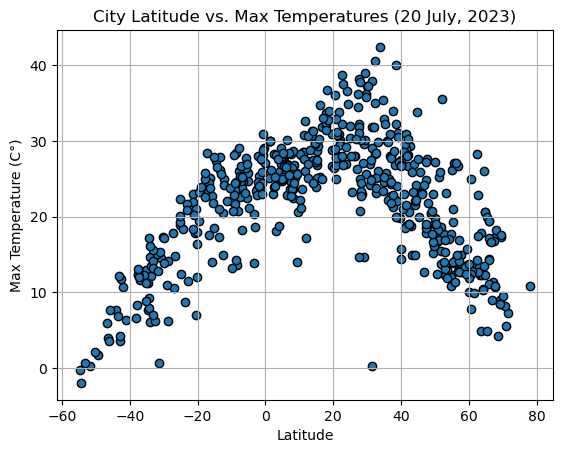

In [39]:
# Build scatter plot for latitude vs. temperature
from datetime import datetime
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")
timestamp = city_data_df["Date"][0]
date_time = datetime.fromtimestamp(timestamp)
str_date = date_time.strftime("%d %B, %Y")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperatures ({str_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C°)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

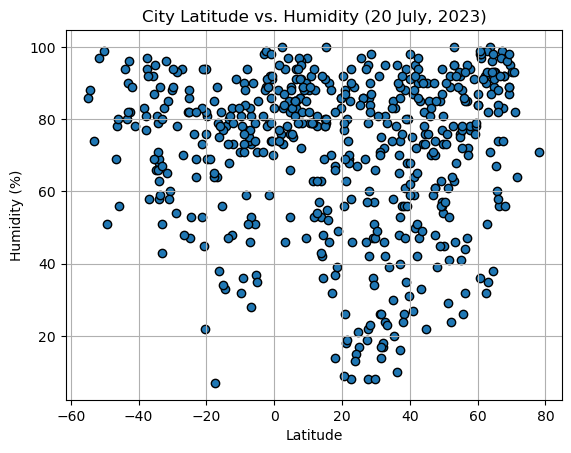

In [40]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({str_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

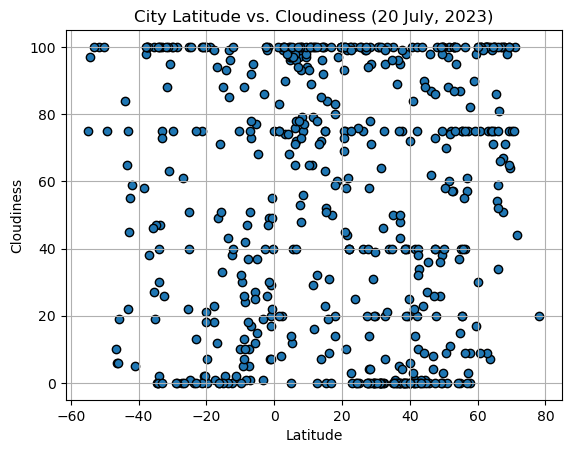

In [41]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({str_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

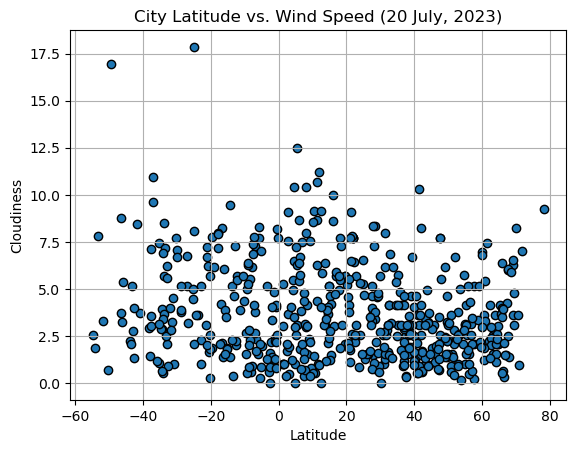

In [42]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({str_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [44]:
# Define a function to create Linear Regression plots
def correlation(x, y):
    p_correlation = st.pearsonr(x, y)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regression_model = model = f'Y = {round(slope, 2)}X + {round(intercept, 2)}'
    y_values = x * slope + intercept
    # print(f"The r value is: {p_correlation}") # To get both pearson correlation and p_value 
    print(f"The r value is: {round(p_correlation[0],4)}")
    plt.plot(x, y_values, color="red", label=regression_model)
    
# correlation(city_data_df["Lat"], city_data_df["Max Temp"])

In [45]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,waddan,29.1614,16.1390,29.66,36,0,4.57,LY,1689889542
4,boras,57.7210,12.9401,13.24,77,82,5.16,SE,1689889543
5,blagoveshchenka,52.8333,79.8667,17.70,78,57,3.75,RU,1689889544
8,olonkinbyen,70.9221,-8.7187,5.61,82,100,0.96,SJ,1689889130
10,tiksi,71.6872,128.8694,7.23,64,44,6.99,RU,1689889137


In [46]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,0.28,97,100,3.31,CL,1689889133
1,waitangi,-43.9535,-176.5597,7.68,94,84,2.24,NZ,1689889127
3,hermanus,-34.4187,19.2345,9.33,79,0,3.93,ZA,1689888953
6,bredasdorp,-34.5322,20.0403,7.72,81,0,2.84,ZA,1689889136
7,port-aux-francais,-49.3500,70.2167,1.74,51,75,16.94,TF,1689888946


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.6273


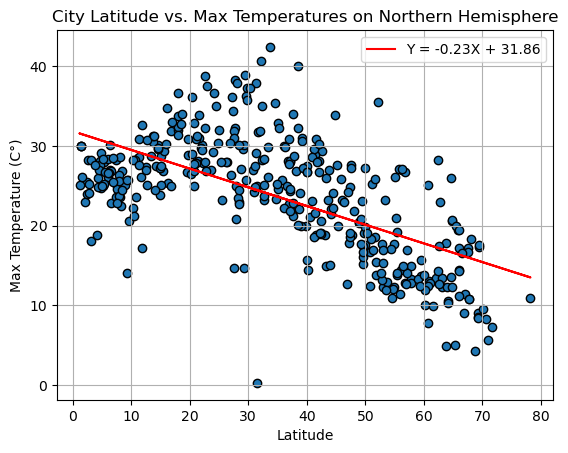

In [47]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolors="black")
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
correlation(x, y)
plt.legend(loc="best")
plt.title(f"City Latitude vs. Max Temperatures on Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C°)")
plt.grid()
plt.show()



The r value is: 0.8586


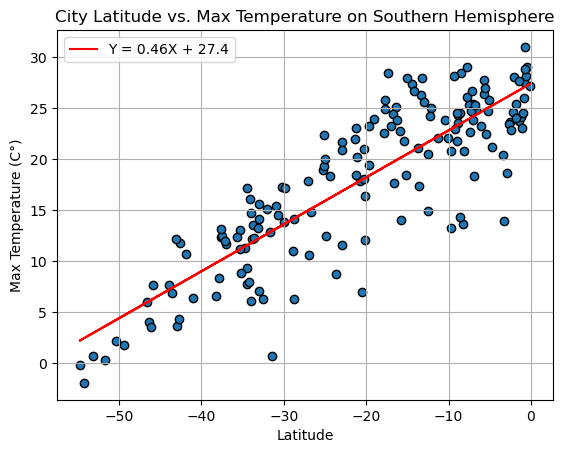

In [48]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], edgecolors="black")
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
correlation(x, y)
plt.legend(loc="best")
plt.title(f"City Latitude vs. Max Temperature on Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C°)")
plt.grid()
plt.show()

## **Discussion about the linear relationship:**
In the past two plots we can observe the relationship between the city latitude and the max temperatures of cities in the northern and southern hemispheres.
In both of the plots, the linear regression have a p value >.05, meaning our correlations are statistically significant.
### For the northern hemisphere
We have an r value around -0.66, what means there is a moderate strenght correlation between the variables, with a negative association, that is that while the latitude increases, the temperature decreases.

### For the southern hemisphere
We have an r value around 0.85, what means there is a strong correlation between the variables, with a positive association, meaning that while the latitude increases, the temperature increases as well.


### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.0461


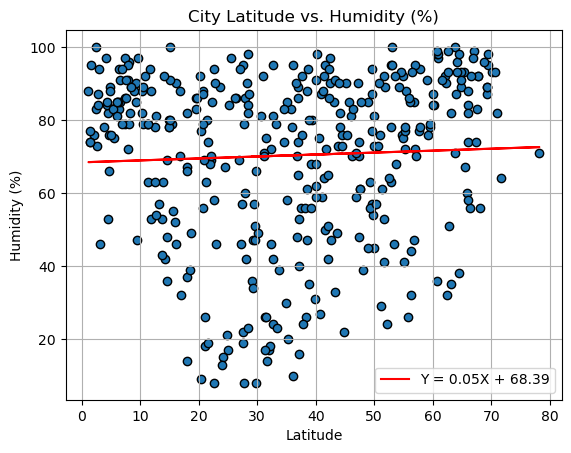

In [49]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolors="black")
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
correlation(x, y)
plt.legend(loc="best")
plt.title(f"City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

The r value is: -0.0927


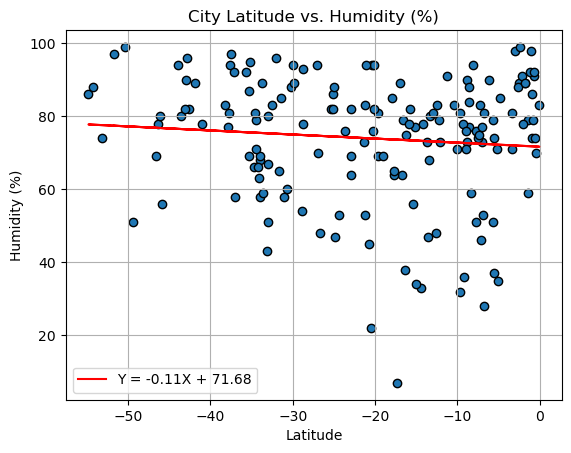

In [51]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolors="black")
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
correlation(x, y)
plt.legend(loc="best")
plt.title(f"City Latitude vs. Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

### Humidity vs. Latitude
In this linear regression we got 
 - 1) for the northern hemisphere, an alpha level < 0.05, so we can consider this relation statistically significant, but it has a r value < .3, so the correlation between these variables in the northern hemisphere is very weak or none, and 
 - 2) for the southern hemisphere we got an alpha level > .05 so the relation between these two variables is not statistically significant, and as the northern hemisphere, it has a r value < .3, so the correlation between these variables is very weak or none.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: -0.0641


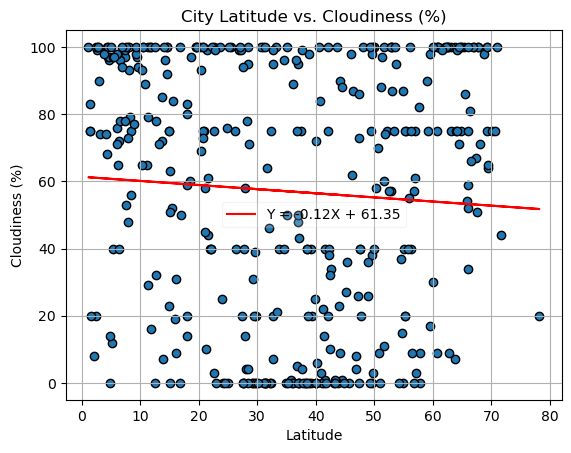

In [52]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], edgecolors="black")
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
correlation(x, y)
plt.legend(loc="best", fancybox=True, framealpha=0.2)
plt.title(f"City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

The r value is: -0.1981


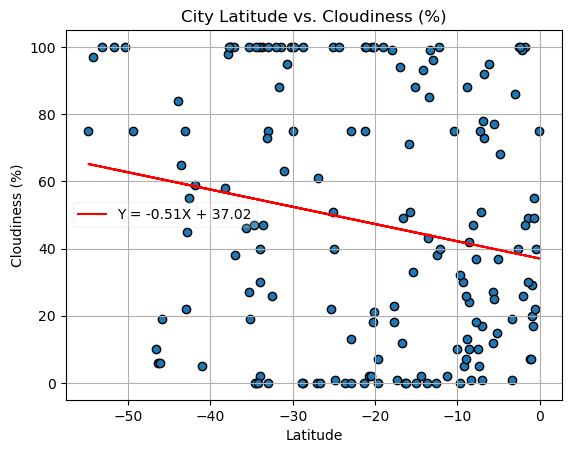

In [53]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], edgecolors="black")
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
correlation(x, y)
plt.legend(loc=6, fancybox=True, framealpha=0.2)
plt.title(f"City Latitude vs. Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

### Cloudiness vs. Latitude
In this linear regression we got 
 - 1) for the northern hemisphere, an alpha level > 0.05, so the relation between these two variables is not statistically significant, and it has a r value < .3, so the correlation between these variables is very weak or none, and 
 - 2) for the southern hemisphere we got an alpha level < 0.05, so the relation between these two variables is statistically significant, and it has a r value < .3, so the correlation between these variables is very weak or none.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: -0.184


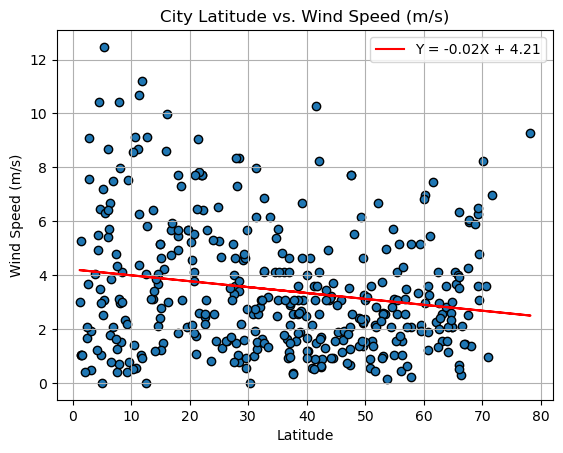

In [54]:
# Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], edgecolors="black")
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
correlation(x, y)
plt.legend(loc="best", fancybox=True)
plt.title(f"City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.show()

The r value is: -0.1607


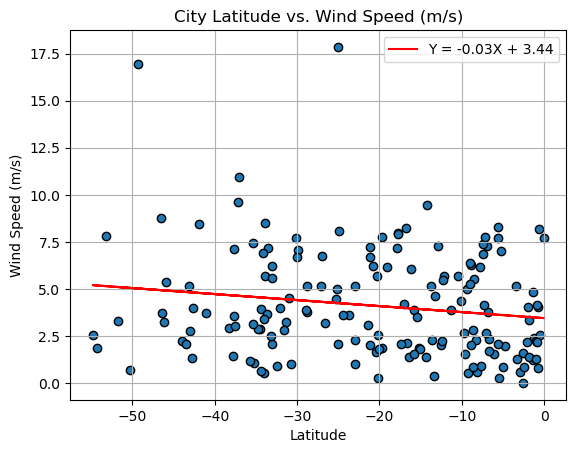

In [55]:
# Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolors="black")
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
correlation(x, y)
plt.legend(loc="best", fancybox=True)
plt.title(f"City Latitude vs. Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.show()

### Wind Speed vs. Latitude
In this linear regression we got 
 - 1) for the northern hemisphere, an alpha level > 0.05, so the relation between these two variables is not statistically significant, and it has a r value < .3, so the correlation between these variables is very weak or none, and 
 - 2) for the southern hemisphere we got an alpha level < 0.05, so the relation between these two variables is statistically significant, and it has a r value < .3, so the correlation between these variables is very weak or none.